In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold,cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import OneClassSVM

In [3]:
#import  train dataset

df=pd.read_csv('/kaggle/input/vakul-adi/Fraud_Detection_Dataset.csv')
df_test=pd.read_csv('/kaggle/input/vakul-adi/Fraud_Detection_Test.csv')
df_test_3=pd.read_csv('/kaggle/input/abcdedf/Fraud_detection_Test_Perturbed.csv')



/tmp/ipykernel_34/2616281395.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test=pd.read_csv('/kaggle/input/vakul-adi/Fraud_Detection_Test.csv')


In [4]:
#Structure of dataset
print(df.describe())
print(df_test.describe())

                  X1             X2             X3             X4  \
count  159999.000000  159999.000000  159999.000000  159999.000000   
mean        7.565888       0.390284      -3.242711      14.023562   
std         1.234900       5.502574       5.981830       0.190413   
min         3.970500     -20.731300     -26.095000      13.434600   
25%         6.618900      -3.595000      -7.517500      13.893400   
50%         7.628300       0.484700      -3.297700      14.025000   
75%         8.582500       4.375350       0.867050      14.164400   
max        11.150600      18.670200      17.188700      14.654500   

                  X5             X6             X7             X8  \
count  159999.000000  159999.000000  159999.000000  159999.000000   
mean        8.522378       7.541808      14.573214       9.334104   
std         4.648674       2.249323       0.412462       2.559733   
min        -6.011100       1.013300      13.076900       0.635100   
25%         5.058600       5.7853

In [5]:
#info of the data set
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Columns: 201 entries, X1 to Response
dtypes: float64(200), int64(1)
memory usage: 245.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 200 entries, X1 to X200
dtypes: float64(199), object(1)
memory usage: 15.3+ MB


In [6]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Columns: 200 entries, X1 to X200
dtypes: float64(200)
memory usage: 2.3 MB


In [7]:
#checking for null values in train
null_values = df.isnull().values.any()
print(null_values)

False


In [8]:
#checking for null values in test
null_values_test=df_test.isnull().values.any()
print(null_values_test)

False


In [9]:
null_values_test3=df_test_3.isnull().values.any()
print(null_values_test3)

False


In [10]:
#check the response distribution
df['Response'].value_counts()

Response
0    141959
1     18040
Name: count, dtype: int64

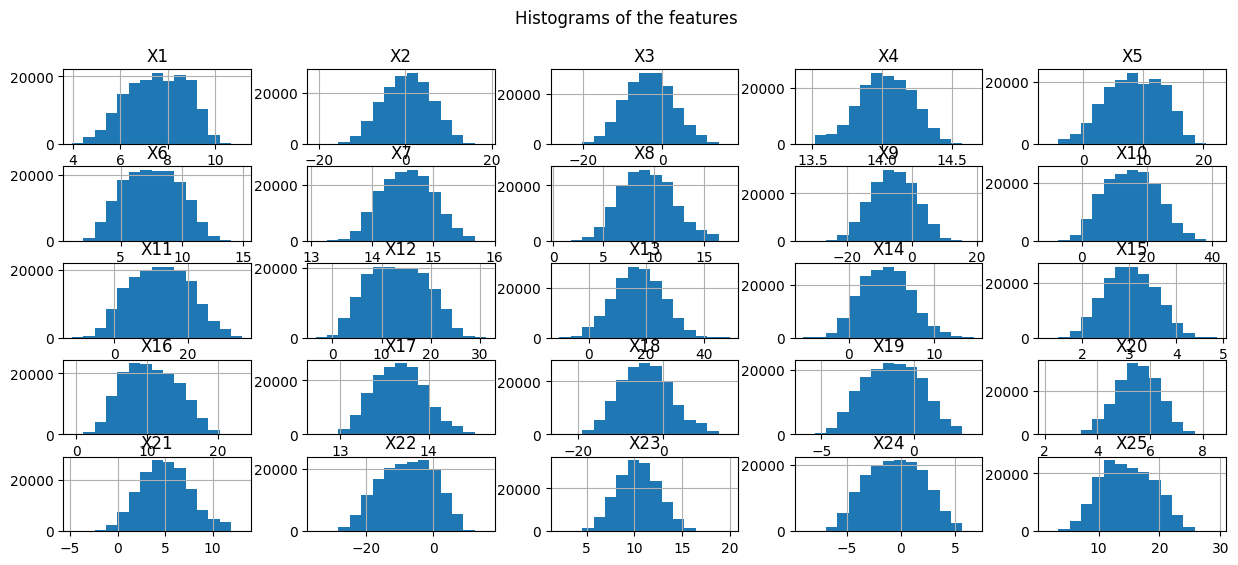

In [11]:
#histograms to visualize the distribution of data
df.iloc[:, :25].hist(bins=15, figsize=(15, 6), layout=(5, 5))
plt.suptitle('Histograms of the features')
plt.show()

In [12]:
#detecting outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of potential outliers detected: {outliers.sum()}")


Number of potential outliers detected: 8701


In [13]:
#standardize the data
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64'])
standardized_data = scaler.fit_transform(numerical_features)
df[numerical_features.columns] = standardized_data


In [14]:
#splitting the dataset into predictor and response variables
X_train = df.drop('Response', axis=1)
y_train = df['Response']


In [15]:
#heatmap
correlation_matrix = X_train.corr()

In [ ]:
#visualize heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
#logistic regression
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')


In [18]:
# Setting up k-fold cross-validation (e.g., k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [19]:
#converting Y train to int
y_train = y_train.astype('int')

In [20]:
# Perform cross-validation and compute the accuracy
scores = cross_val_score(logistic_model, X_train, y_train, cv=kf, scoring='accuracy')
print("Accuracy for each fold: ", scores)
print("Mean accuracy: ", np.mean(scores))


Accuracy for each fold:  [0.90665625 0.9071875  0.9039375  0.90528125 0.90499703]
Mean accuracy:  0.9056119062314447


In [21]:
#calculating the ROC score
predicted = cross_val_predict(logistic_model, X_train, y_train, cv=kf)
roc_auc = roc_auc_score(y_train, predicted)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.6396410215503807


In [22]:
#decison tree
decision_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=50, min_samples_leaf=10, random_state=42)



In [23]:
#cross validation
kf1= KFold(n_splits=5, shuffle=True, random_state=42)


In [24]:
# Evaluate the model's accuracy
accuracy_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=kf1, scoring='accuracy')
print("Accuracy for each fold: ", accuracy_scores)
print("Mean accuracy: ", np.mean(accuracy_scores))


Accuracy for each fold:  [0.88153125 0.88284375 0.8760625  0.88196875 0.87958999]
Mean accuracy:  0.8803992474374199


In [25]:
#ROC score
y_proba = cross_val_predict(decision_tree_model, X_train, y_train, cv=kf1, method="predict_proba")


In [26]:
#ROC score
roc_auc1 = roc_auc_score(y_train, y_proba[:, 1])  # Use the probabilities for the positive class

print("ROC-AUC Score:", roc_auc1)

ROC-AUC Score: 0.6646165328895047


In [27]:
#random forest-cross validation
kf2 = KFold(n_splits=5, shuffle=True, random_state=42)


In [28]:
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)




In [29]:
# Evaluate the model's accuracy
accuracy_scores1= cross_val_score(random_forest_model, X_train, y_train, cv=kf2, scoring='accuracy')
print("Accuracy for each fold: ", accuracy_scores1)
print("Mean accuracy: ", np.mean(accuracy_scores1))


Accuracy for each fold:  [0.88946875 0.8883125  0.8844375  0.8893125  0.88577768]
Mean accuracy:  0.8874617861105035


In [30]:
#ROC score
y_proba1 = cross_val_predict(random_forest_model, X_train, y_train, cv=kf2, method="predict_proba")


In [31]:
roc_auc = roc_auc_score(y_train, y_proba1[:, 1])

In [32]:
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8004438857763949


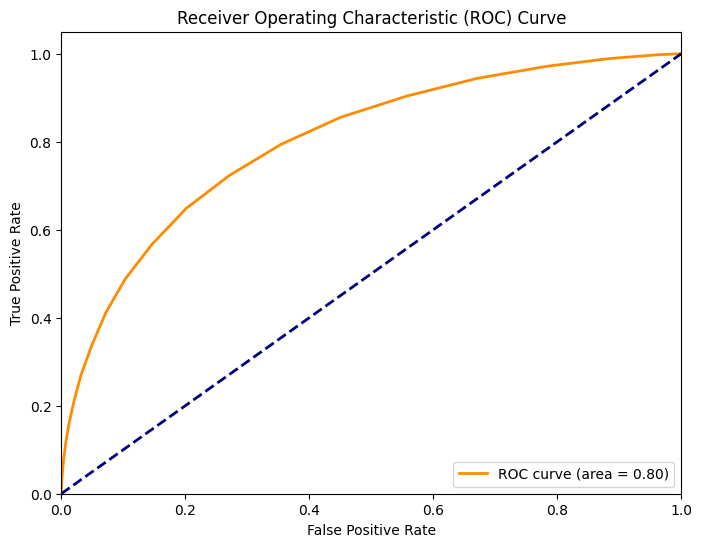

In [33]:
#visualize ROC
y_train_binary = [1 if y == 2 else 0 for y in y_train]
fpr, tpr, thresholds = roc_curve(y_train_binary, y_proba1[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
#standardizing test data set
scaler = StandardScaler()
numerical_features_test = df_test.select_dtypes(include=['float64'])
standardized_data_test = scaler.fit_transform(numerical_features_test)
df_test[numerical_features_test.columns] = standardized_data_test

In [35]:
#model fit
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
#support vector
svm_classifier = SVC(kernel='rbf')

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [ ]:
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'error'  # Evaluation metric
}

In [ ]:
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

In [ ]:
y_pred = gb_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

In [ ]:
fpr, tpr, _ = roc_curve(y_train, gb_clf.predict_proba(X_train)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = gb_clf.predict(df_test)
output_df = pd.DataFrame(y_pred, columns=['Predicted'])
output_path = '/kaggle/input/abcdedf/predicted_outputs1.csv'
output_df.to_csv(output_path, index=False)
print(f"Predicted outputs saved to {output_path}")

In [37]:
model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)

In [38]:
model.fit(X_train)

OneClassSVM(gamma='auto', nu=0.01)

In [39]:
#standardize test
scaler = StandardScaler()
numerical_features_test = df_test_3.select_dtypes(include=['float64'])
standardized_data_test = scaler.fit_transform(numerical_features_test)
df_test_3[numerical_features_test.columns] = standardized_data_test

In [40]:
#predictions
predictions = model.predict(df_test_3)

In [41]:
mapped_predictions = np.where(predictions == -1, 0, 1)


In [45]:
output_df = pd.DataFrame(mapped_predictions, columns=['Predicted'])
mapped_predictions = df_test_3.copy()  # Creating a copy of the testing data
mapped_predictions['Predicted_Response'] = predictions

# Save the DataFrame to a CSV file
mapped_predictions.to_csv('predictions_with_testing_data.csv', index=False)

In [46]:
#importing the libraries
from sklearn.neural_network import MLPClassifier

#creating the neural network model
neural_network_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

#performing k-fold cross-validation
kf3 = KFold(n_splits=5, shuffle=True, random_state=42)

#evaluating the model's accuracy
accuracy_scores2 = cross_val_score(neural_network_model, X_train, y_train, cv=kf3, scoring='accuracy')

print("Accuracy for each fold: ", accuracy_scores2)
print("Mean accuracy: ", np.mean(accuracy_scores2))

y_proba2 = cross_val_predict(neural_network_model, X_train, y_train, cv=kf3, method="predict_proba")

roc_auc2 = roc_auc_score(y_train, y_proba2[:, 1])
print("ROC-AUC Score:", roc_auc2)

Accuracy for each fold:  [0.85846875 0.848875   0.84940625 0.85703125 0.85308916]
Mean accuracy:  0.853374081807244
ROC-AUC Score: 0.7391371248098881


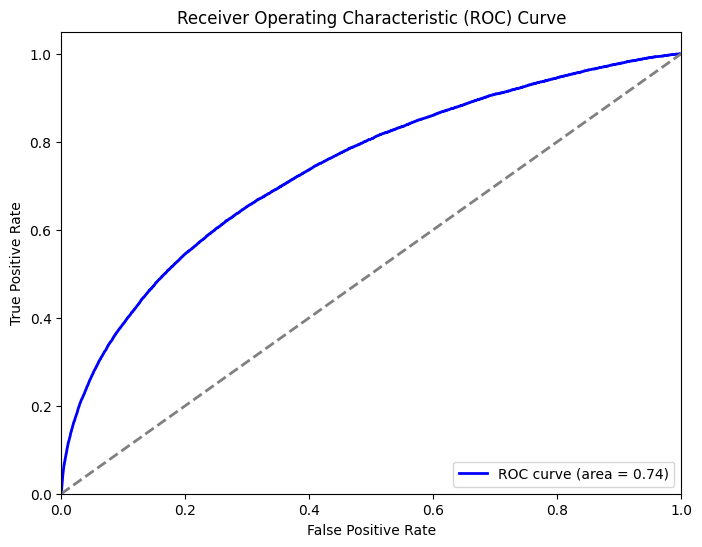

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_proba2[:, 1], pos_label=2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
test_data = pd.read_csv('/kaggle/input/abcdedf/Fraud_detection_Test_Perturbed.csv')

# Fit the neural network model with the training data (assuming X_train and y_train are your training data and labels)
neural_network_model.fit(X_train, y_train)

# Use the trained model to predict the response values
y_pred = neural_network_model.predict(test_data)

# Create a DataFrame with the testing data and the predicted response values
predictions_df = test_data.copy()  # Creating a copy of the testing data
predictions_df['Predicted_Response'] = y_pred

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions_with_testing_data2.csv', index=False)

print("Testing data and predicted response values saved to 'predictions_with_testing_data.csv'",)

Testing data and predicted response values saved to 'predictions_with_testing_data.csv'


In [56]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv("/kaggle/input/vakul-adi/Fraud_Detection_Dataset.csv")

# Determine number of fraud cases in dataset
fraud = df[df['Response'] == 1]
valid = df[df['Response'] == 0]
outlierFraction = len(fraud) / float(len(valid))
print("Outlier Fraction:", outlierFraction)

# Upsample minority class (fraud)
fraud_upsampled = resample(fraud, replace=True, n_samples=len(valid), random_state=42)

# Downsample majority class (valid)
valid_downsampled = resample(valid, replace=False, n_samples=len(fraud), random_state=42)

# Combine upsampled minority class with original majority class
df_upsampled = pd.concat([valid, fraud_upsampled])
df_downsampled = pd.concat([valid_downsampled, fraud])

# Define feature and target variables
X_up = df_upsampled.drop(['Response'], axis=1)
y_up = df_upsampled['Response']
X_down = df_downsampled.drop(['Response'], axis=1)
y_down = df_downsampled['Response']

# Split the data into training and testing sets
xTrain_up, xTest_up, yTrain_up, yTest_up = train_test_split(X_up, y_up, test_size=0.2, random_state=42)
xTrain_down, xTest_down, yTrain_down, yTest_down = train_test_split(X_down, y_down, test_size=0.2, random_state=42)

# Define the neural network model
model_up = Sequential([
    Dense(64, activation='relu', input_shape=(X_up.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_down = Sequential([
    Dense(64, activation='relu', input_shape=(X_down.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the models
model_up.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_down.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
model_up.fit(xTrain_up, yTrain_up, epochs=10, batch_size=64, validation_data=(xTest_up, yTest_up))
model_down.fit(xTrain_down, yTrain_down, epochs=10, batch_size=64, validation_data=(xTest_down, yTest_down))

# Evaluate the models
loss_up, accuracy_up = model_up.evaluate(xTest_up, yTest_up)
print("Upsampled Data - Test Accuracy:", accuracy_up)

loss_down, accuracy_down = model_down.evaluate(xTest_down, yTest_down)
print("Downsampled Data - Test Accuracy:", accuracy_down)


Outlier Fraction: 0.1270789453292852


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
  84/3549 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5005 - loss: 2.9219

I0000 00:00:1714510928.824155     542 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3549/3549 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6460 - loss: 0.7693 - val_accuracy: 0.7540 - val_loss: 0.5105
Epoch 2/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7427 - loss: 0.5195 - val_accuracy: 0.7631 - val_loss: 0.5005
Epoch 3/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7539 - loss: 0.5044 - val_accuracy: 0.7651 - val_loss: 0.4933
Epoch 4/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7568 - loss: 0.4986 - val_accuracy: 0.7664 - val_loss: 0.4900
Epoch 5/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7606 - loss: 0.4914 - val_accuracy: 0.7664 - val_loss: 0.4935
Epoch 6/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7646 - loss: 0.4858 - val_accuracy: 0.7614 - val_loss: 0.4910
Epoch 7/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7660 - loss: 0.4837 - val_accuracy: 0.7605 - val_loss: 0.4870
Epoch 8/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7669 - loss: 0.4827 - val_accura

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv("/kaggle/input/vakul-adi/Fraud_Detection_Dataset.csv")

# Determine number of fraud cases in dataset
fraud = df[df['Response'] == 1]
valid = df[df['Response'] == 0]
outlierFraction = len(fraud) / float(len(valid))
print("Outlier Fraction:", outlierFraction)

# Standardize the features
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Split into features and target
X = df.drop(['Response'], axis=1)
y = df['Response']

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample minority class (fraud)
fraud_upsampled = resample(fraud, replace=True, n_samples=len(valid), random_state=42)

# Downsample majority class (valid)
valid_downsampled = resample(valid, replace=False, n_samples=len(fraud), random_state=42)

# Combine upsampled minority class with original majority class
df_upsampled = pd.concat([valid, fraud_upsampled])
df_downsampled = pd.concat([valid_downsampled, fraud])

# Define feature and target variables
X_up = df_upsampled.drop(['Response'], axis=1)
y_up = df_upsampled['Response']
X_down = df_downsampled.drop(['Response'], axis=1)
y_down = df_downsampled['Response']

# Split the data into training and testing sets
xTrain_up, xTest_up, yTrain_up, yTest_up = train_test_split(X_up, y_up, test_size=0.2, random_state=42)
xTrain_down, xTest_down, yTrain_down, yTest_down = train_test_split(X_down, y_down, test_size=0.2, random_state=42)

# Define the neural network model
model_up = Sequential([
    Dense(64, activation='relu', input_shape=(X_up.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_down = Sequential([
    Dense(64, activation='relu', input_shape=(X_down.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the models
model_up.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_down.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
model_up.fit(xTrain_up, yTrain_up, epochs=10, batch_size=64, validation_data=(xTest_up, yTest_up))
model_down.fit(xTrain_down, yTrain_down, epochs=10, batch_size=64, validation_data=(xTest_down, yTest_down))

# Evaluate the models
loss_up, accuracy_up = model_up.evaluate(xTest_up, yTest_up)
print("Upsampled Data - Test Accuracy:", accuracy_up)

loss_down, accuracy_down = model_down.evaluate(xTest_down, yTest_down)
print("Downsampled Data - Test Accuracy:", accuracy_down)


Outlier Fraction: 0.1270789453292852


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6415 - loss: 0.8363 - val_accuracy: 0.7510 - val_loss: 0.5098
Epoch 2/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7378 - loss: 0.5214 - val_accuracy: 0.7594 - val_loss: 0.5081
Epoch 3/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7453 - loss: 0.5107 - val_accuracy: 0.7643 - val_loss: 0.5044
Epoch 4/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7513 - loss: 0.5069 - val_accuracy: 0.7626 - val_loss: 0.4937
Epoch 5/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7545 - loss: 0.5048 - val_accuracy: 0.7478 - val_loss: 0.5116
Epoch 6/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7539 - loss: 0.5038 - val_accuracy: 0.7636 - val_loss: 0.4948
Epoch 7/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7600 - loss: 0.4964 - val_accuracy: 0.7440 - val_loss: 0.5105
Epoch 8/10
3549/3549 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7607 - loss: 0.4963 -